In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [3]:
import pandas as pd
import numpy as np


In [4]:
df_original = pd.read_csv("../input/wine-reviews/winemag-data_first150k.csv")

In [5]:
df_original.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
df_original.shape

(150930, 11)

<Axes: xlabel='country'>

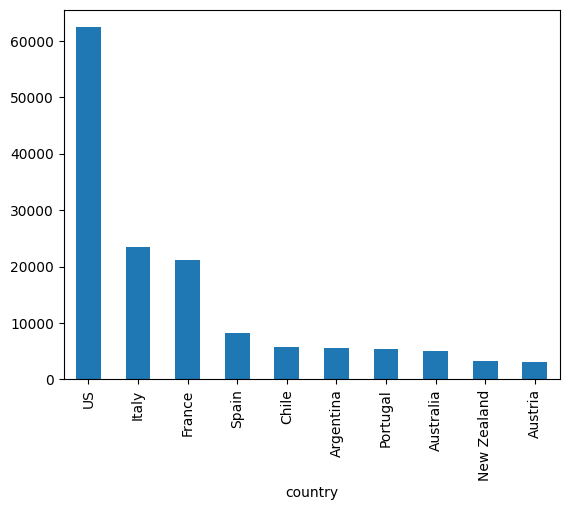

In [8]:
df_original['country'].value_counts().head(10).plot.bar()

<Axes: xlabel='points'>

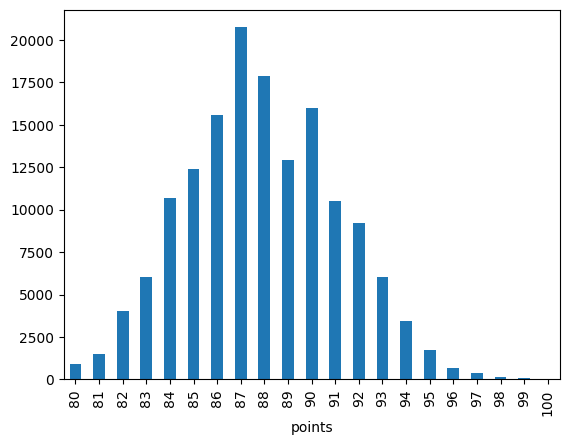

In [9]:
df_original['points'].value_counts().sort_index().plot.bar()

<Axes: xlabel='price'>

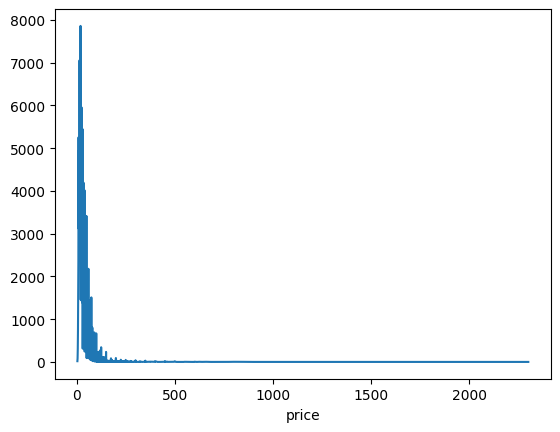

In [10]:
df_original['price'].value_counts().sort_index().plot.line()

<Axes: xlabel='points', ylabel='price'>

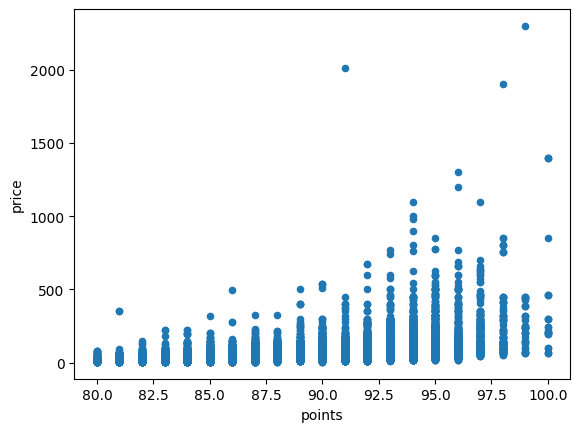

In [11]:
df_original.plot.scatter(x='points', y='price')

In [12]:
print(list(df_original.price.isnull()).count(True))
print(list(df_original.region_2.isnull()).count(True))


13695
89977


In [14]:
import seaborn as sns


<Axes: xlabel='country', ylabel='count'>

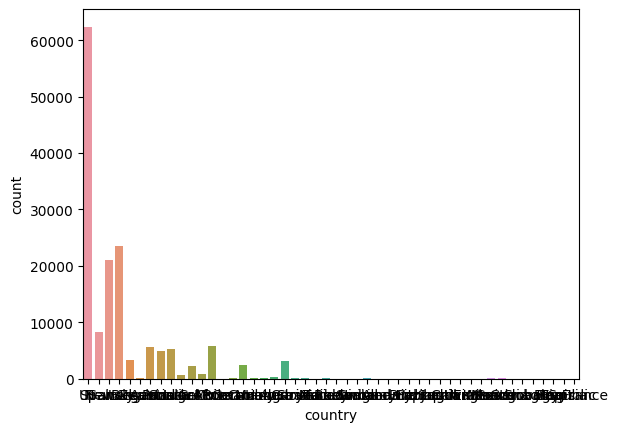

In [17]:
sns.countplot(x=df_original['country'])

<Axes: xlabel='count', ylabel='country'>

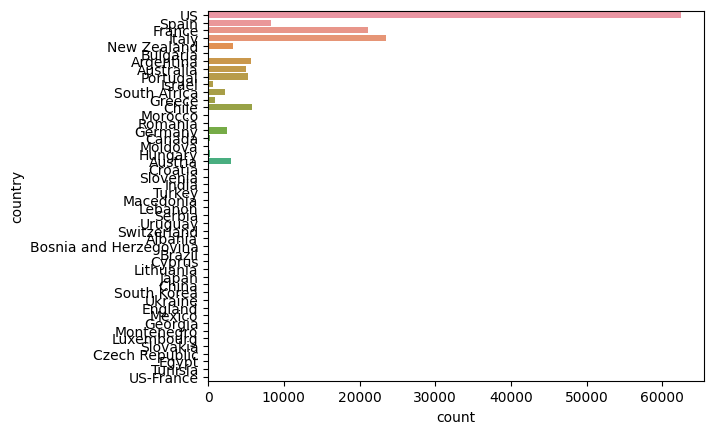

In [18]:
sns.countplot(y=df_original['country'])


<Axes: xlabel='country', ylabel='count'>

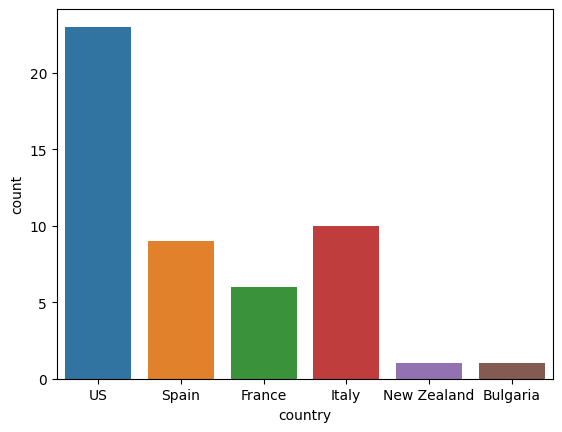

In [19]:
sns.countplot(x=df_original['country'].head(50))


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price of Wine')

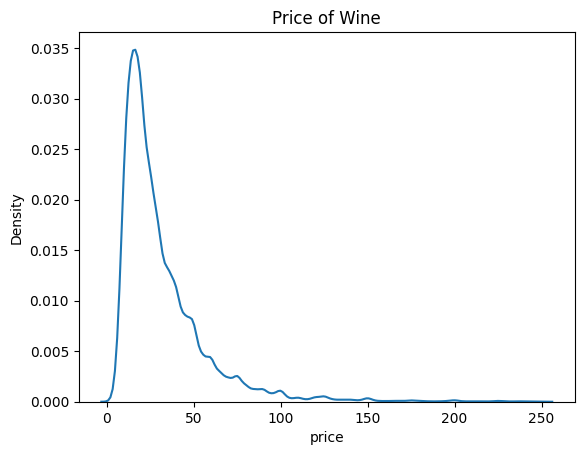

In [21]:
ax = sns.kdeplot(df_original.query('price < 250').price)
ax.set_title("Price of Wine")


/tmp/ipykernel_48/1053567684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_original['points'], bins = 20, kde = False)


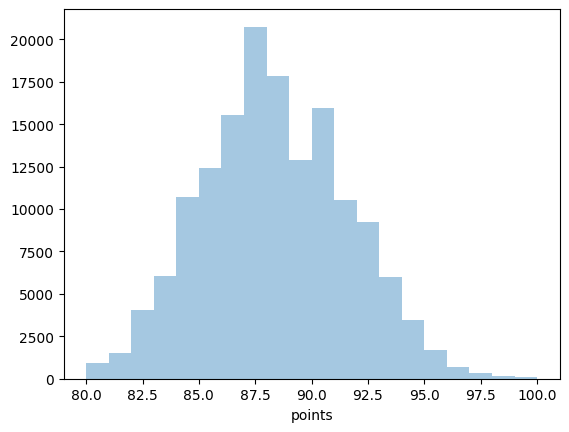

In [22]:
ax = sns.distplot(df_original['points'], bins = 20, kde = False)

<Axes: xlabel='variety', ylabel='points'>

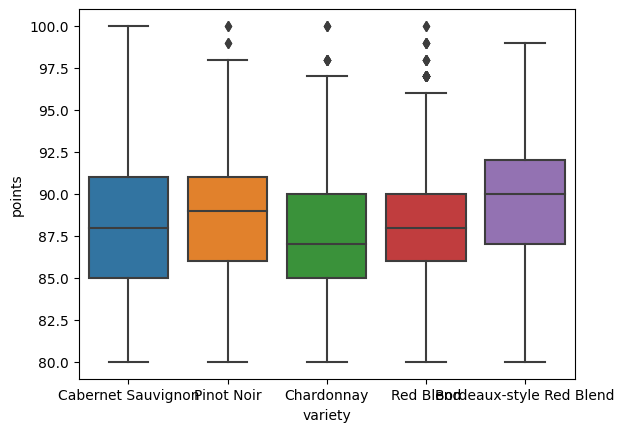

In [23]:
df1 = df_original[df_original.variety.isin(df_original.variety.value_counts().head(5).index)]
sns.boxplot(
x = 'variety',
y = 'points',
data = df1
)


In [24]:
df_original.mean(numeric_only = True)

Unnamed: 0    75464.500000
points           87.888418
price            33.131482
dtype: float64

In [26]:
df_original.median(numeric_only = True)

Unnamed: 0    75464.5
points           88.0
price            24.0
dtype: float64

In [31]:
df_original.mode(numeric_only=True)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,points,price
0,0,87.0,20.0
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
...,...,...,...
150925,150925,NaN,NaN
150926,150926,NaN,NaN
150927,150927,NaN,NaN
150928,150928,NaN,NaN


In [28]:
df_original.var(numeric_only = True)

Unnamed: 0    1.898335e+09
points        1.038381e+01
price         1.319327e+03
dtype: float64

In [29]:
df_original.std(numeric_only = True)

Unnamed: 0    43569.882402
points            3.222392
price            36.322536
dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


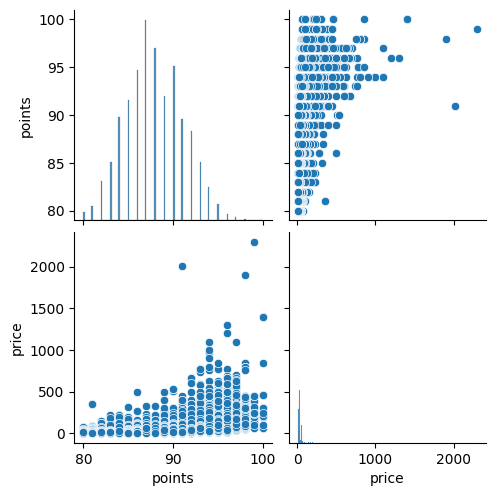

In [30]:
sns.pairplot(df_original[['points', 'price']])